# Visualize the model performance after using tab_err on the test set.

We run experiments on the downstream performance of ML models on both clean and errored test data.

The error models we chose were composed of the error mechanisms: EAR, ECAR, and ENAR, the wrong unit and extraneous error types, and error rates: 0.1, 0.25, 0.5, 0.75, 0.9

The criteria for choosing datasets:

- Less than 100,000 rows and 100 columns

- From the Tree Based Methods Paper

See the bit on how we compare performance later in the notebook.

In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
def aggregate_results(root_dir):
    """Aggregate error metric scores from result.csv files in a nested directory structure.
    
    Args:
        root_dir (str): The top-level directory path
    
    Returns:
        pd.DataFrame: Multi-indexed DataFrame with avergae scores for each (error_type, error_rate, mechanism, metric)
    """
    raw_records = []
    
    for dataset_id in os.listdir(root_dir):
        dataset_path = os.path.join(root_dir, dataset_id)
        if not os.path.join(root_dir, dataset_id):
            continue
    
        for error_rate in os.listdir(dataset_path):
            rate_path = os.path.join(dataset_path, error_rate)
            results_file = os.path.join(rate_path, 'results.csv')
            error_props_file = os.path.join(rate_path, 'error_props.csv')
            if not os.path.isfile(results_file):
                continue
    
            df = pd.read_csv(results_file)  # Rows: metric, columns: metadata/metric values
            eprop_df = pd.read_csv(error_props_file)
            
            for _, row in df.iterrows():
                for mechanism in ["ECAR", "EAR", "ENAR", "clean"]:
                    raw_records.append({
                        'error_type': os.path.basename(root_dir),
                        'dataset_id': dataset_id,
                        'error_rate': float(error_rate),
                        'mechanism': mechanism,
                        'metric': row['evaluation_metric'],
                        'score': row[mechanism],
                        'actual_error_rate': eprop_df.iloc[0].mean()
                    })
            
    
    return pd.DataFrame(raw_records)


Aggregate the results from the experiment directories

In [38]:
clf_wrongunit_extraneous = aggregate_results("../results/clf-wrongunit-extraneous")

Number of classification datasets

In [39]:
len(clf_wrongunit_extraneous.groupby("dataset_id").size())

15

Range, mean and standard deviation of actual error rates vs theoretical/specified (since we may have an odd number of rows it is not always exact, i.e. what is 25% of 3?)

In [40]:
clf_wrongunit_extraneous.groupby("error_rate")["actual_error_rate"].mean()

error_rate
0.10    0.099330
0.25    0.249468
0.50    0.499577
0.75    0.749546
0.90    0.899529
Name: actual_error_rate, dtype: float64

In [41]:
clf_wrongunit_extraneous.groupby("error_rate")["actual_error_rate"].var()**(.5)


error_rate
0.10    0.000724
0.25    0.000769
0.50    0.000624
0.75    0.000683
0.90    0.000547
Name: actual_error_rate, dtype: float64

In [30]:
clf_wrongunit_extraneous.groupby("error_rate")["actual_error_rate"].min()

error_rate
0.10    0.097792
0.25    0.247059
0.50    0.498039
0.75    0.747634
0.90    0.898039
Name: actual_error_rate, dtype: float64

In [31]:
clf_wrongunit_extraneous.groupby("error_rate")["actual_error_rate"].min()

error_rate
0.10    0.097792
0.25    0.247059
0.50    0.498039
0.75    0.747634
0.90    0.898039
Name: actual_error_rate, dtype: float64

Violin plots of all datasets

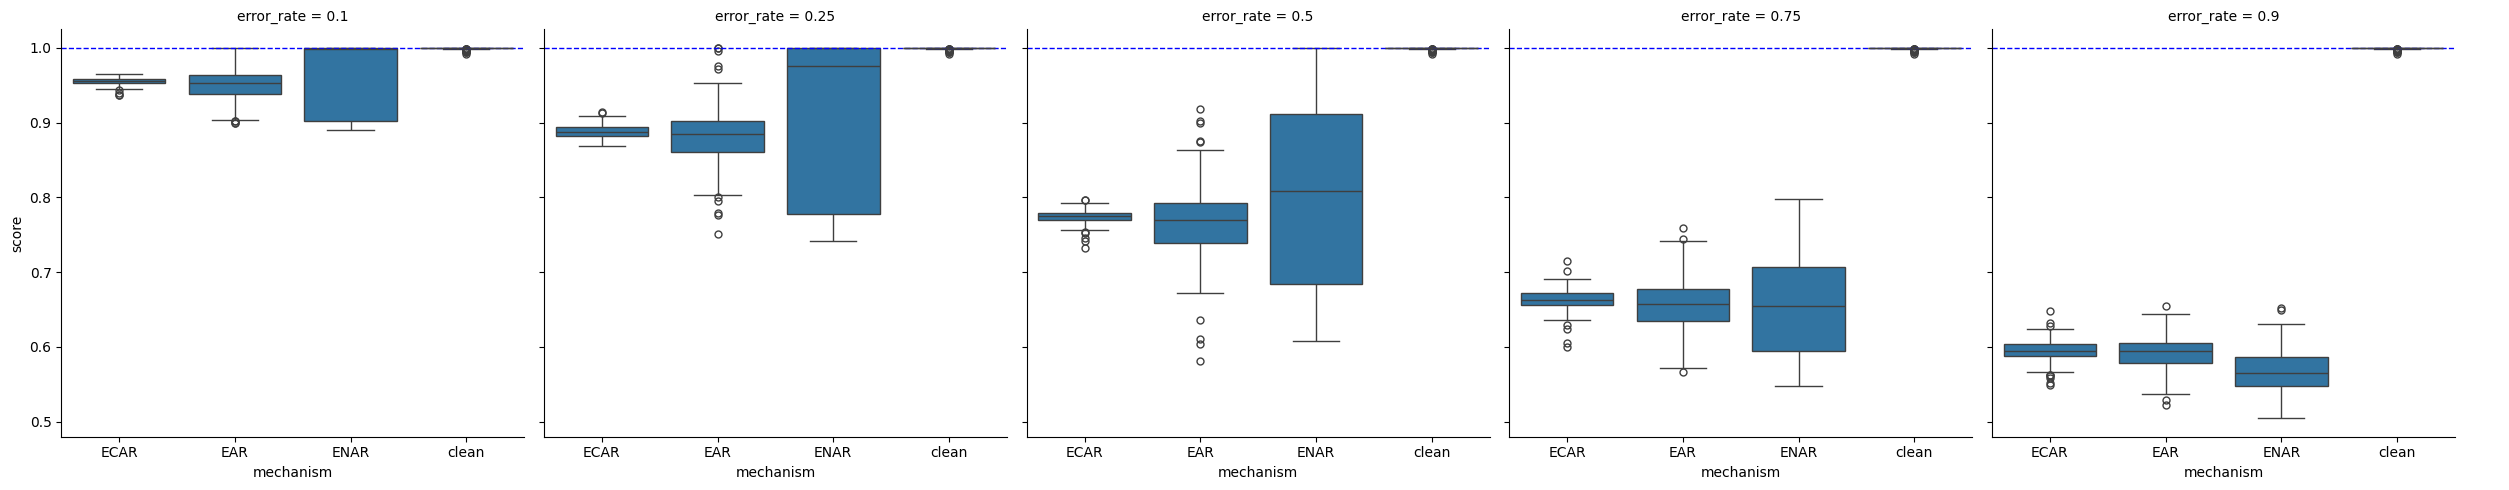

In [44]:
g = sns.catplot(clf_wrongunit_extraneous, x="mechanism", y="score", col="error_rate", kind="box")  # easier to see the difference between error rates
g.map(plt.axhline, y=1, color='b', linestyle='--', linewidth=1)

Violin plots of each dataset

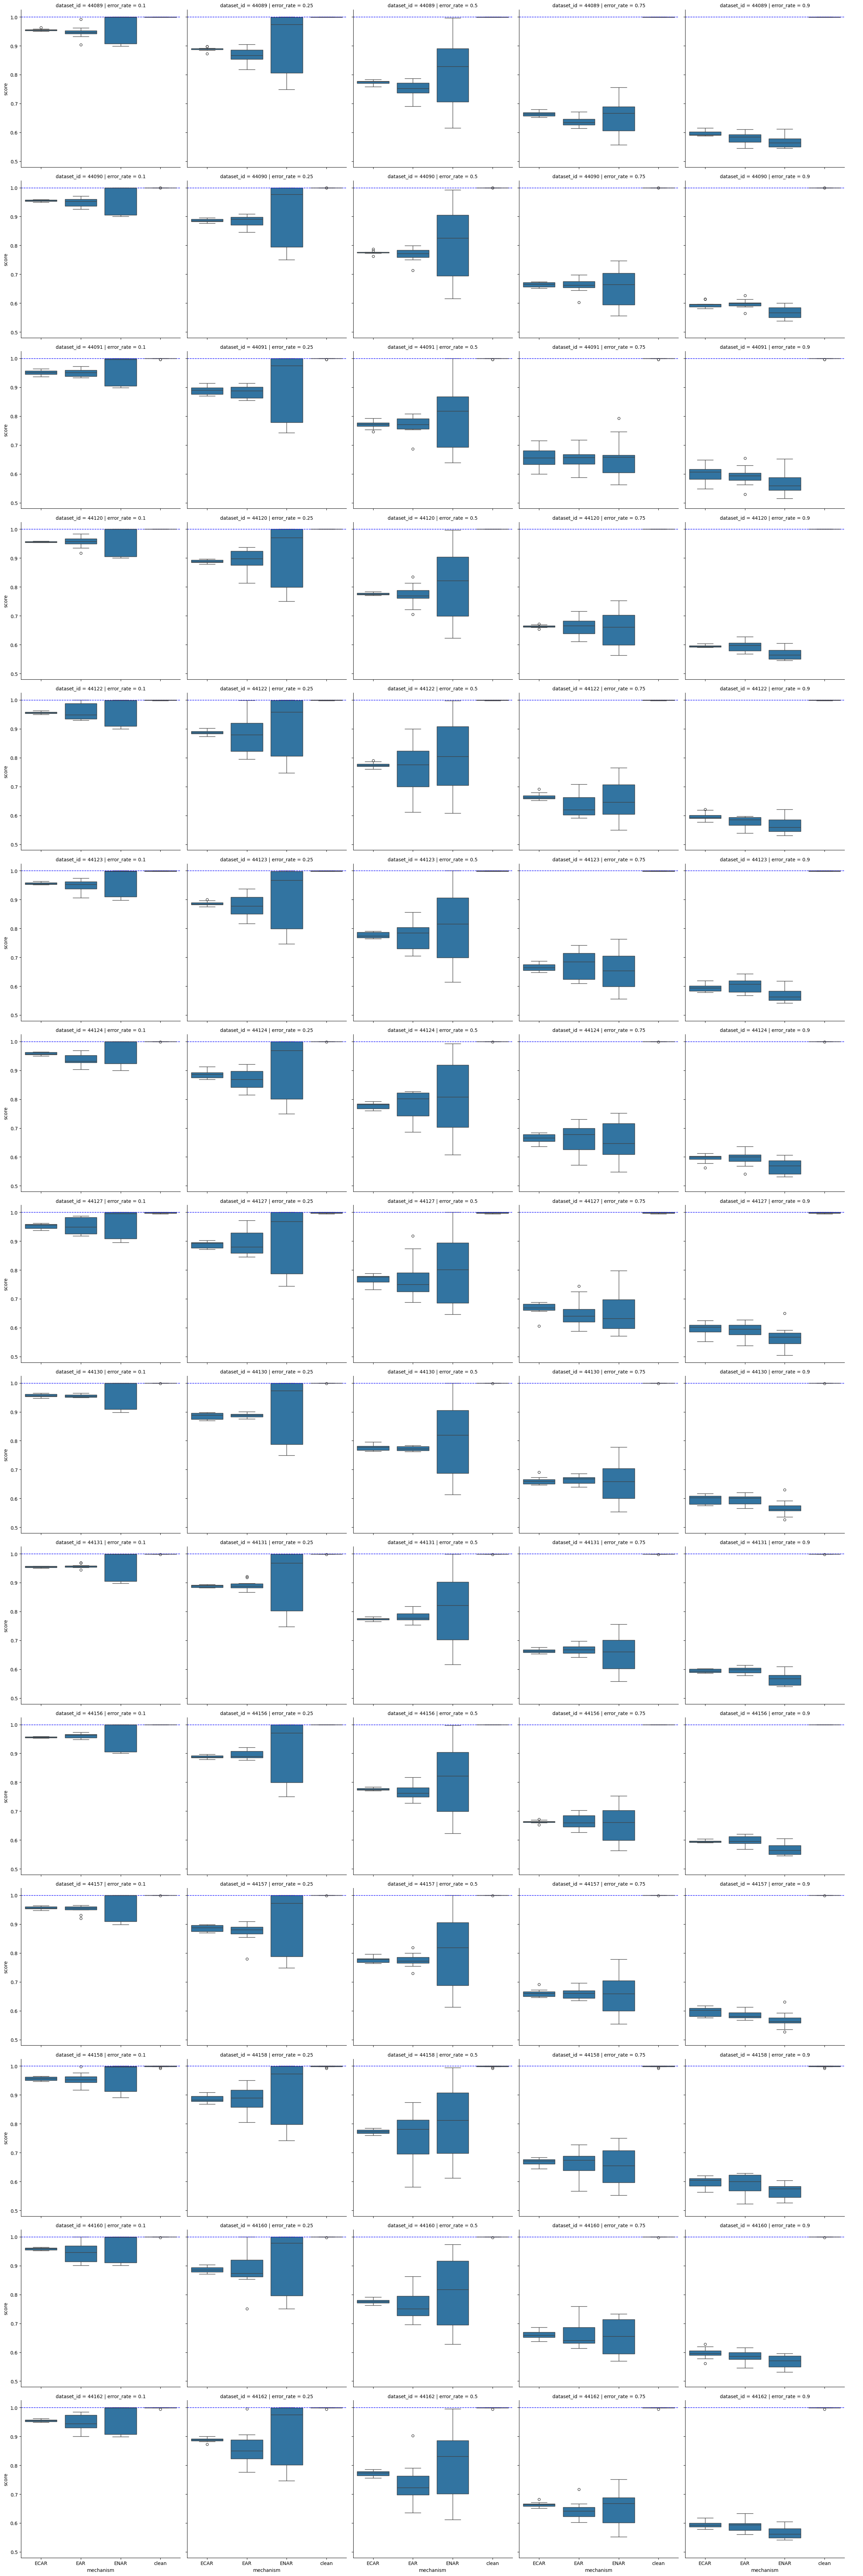

In [47]:
g = sns.catplot(clf_wrongunit_extraneous, x="mechanism", y="score", col="error_rate", row="dataset_id", kind="box")  # Easier to see the difference between error rates
g.map(plt.axhline, y=1, color='b', linestyle='--', linewidth=1)